Part 2 of the data analysis for section 2: Trend data time series analysis.

# load Data

In [3]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# from https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

pd.set_option('display.max_colwidth', None)

# Suppress all warnings
warnings.filterwarnings('ignore')

In [4]:
df_frontpage = pd.read_parquet('../data/a1_data.parquet')


# parameters
leanings = ['Left', 'Lean Left', 'Center', 'Lean Right', 'Right']
trend_path = "../data/trend_data/one_NE/"

# Analyze Trend Data

## Trend graphs

In [5]:
import pandas as pd
from datetime import datetime, date, timedelta

# helper functions
def load_trend_data(dir_path, kword, replace_col_name = True):
    # Replace 'file_path.csv' with the path to your CSV file
    path = dir_path + kword + "_trend.csv"
    df = pd.read_csv(path)

    df = df[[kword]]

    if replace_col_name:
        df.rename(columns={kword: "Google"}, inplace=True)

    return df

def group_by_day(time):
    # "20220101064729" -> "0101"
    return time[:8]

def word_counts_by_day(df, word, leaning):
    df = df[df["word_2"] == word]
    df["date"] = df["date"].apply(group_by_day)

    grouped_value_counts = df.groupby('date')['date'].value_counts()
        
    # Loop through the date range
    start_date = date(2022, 1, 1)
    current_date = start_date
    data = []
    for i in range(90):
        strdate = current_date.strftime('%Y%m%d')
        if strdate in grouped_value_counts:
            data.append((grouped_value_counts[strdate]))
        else:
            data.append(0)
            
        current_date += timedelta(days=1)

    return pd.DataFrame(data,  columns=[leaning])

In [6]:
# load trend data
biden_trend = load_trend_data(trend_path, "Biden")

df_left = df_frontpage[df_frontpage["leaning"].isin(["Left", "Lean Left"])]
df_right = df_frontpage[df_frontpage["leaning"].isin(['Lean Right', 'Right'])]

In [7]:
def graph_keyword_trend(kword, df_left = df_left, df_right = df_right, google_trend = None):
    left_trend = word_counts_by_day(df_left, kword, "left")
    right_trend = word_counts_by_day(df_right, kword, "right")

    if google_trend is None:
        google_trend = load_trend_data(trend_path, kword)

    sns.lineplot(pd.concat([left_trend, right_trend, biden_trend], axis=1))
    return pd.concat([left_trend, right_trend, biden_trend], axis=1)

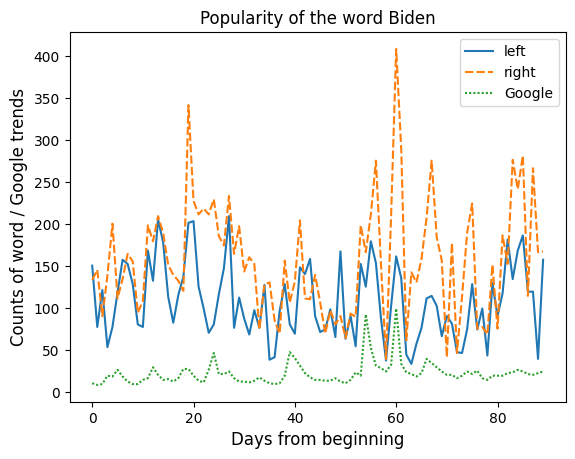

In [8]:
# graph trend for Biden
a = graph_keyword_trend("Biden")

# Set title and labels with font size
plt.title('Popularity of the word Biden', fontsize=12)
plt.xlabel('Days from beginning', fontsize=12)
plt.ylabel('Counts of word / Google trends', fontsize=12)

# Show the plot
plt.show()

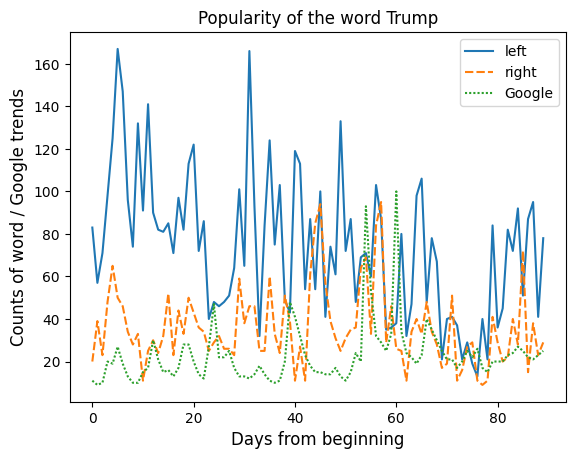

In [9]:
# graph trend for Trump
a = graph_keyword_trend("Trump")

# Set title and labels with font size
plt.title('Popularity of the word Trump', fontsize=12)
plt.xlabel('Days from beginning', fontsize=12)
plt.ylabel('Counts of word / Google trends', fontsize=12)

# Show the plot
plt.show()

In [23]:
import csv

def read_csv_to_list(file_path):
    with open(file_path, newline='') as csvfile:
        reader = csv.reader(csvfile)
        return list(reader)[0]

left = read_csv_to_list('../data/NER_data/left_NER.csv')
right= read_csv_to_list('../data/NER_data/right_NER.csv')

left = [x.strip() for x in left]
right = [x.strip() for x in right]

In [27]:
google_trend = pd.read_csv("../data/trend_data/Google_weighted_trend.csv")

In [28]:
google_trend

,Left,Right
0,22.507664,38.853872
1,20.656968,40.599323
2,21.651119,39.335496
3,37.973738,59.961969
4,34.491280,58.560918
...,...,...
85,30.808561,49.779323
86,30.971332,41.795208
87,30.777018,49.525579
88,31.938106,50.487554


In [11]:
df_left_2 = df_left.copy(deep=True)
df_left_2['word_2'] = df_left['word_2'].replace(left, '_left')
df_left_2['word_2'] = df_left_2['word_2'].replace(right, '_right')

df_right_2 = df_right.copy(deep=True)
df_right_2['word_2'] = df_right['word_2'].replace(left, '_left')
df_right_2['word_2'] = df_right_2['word_2'].replace(right, '_right')

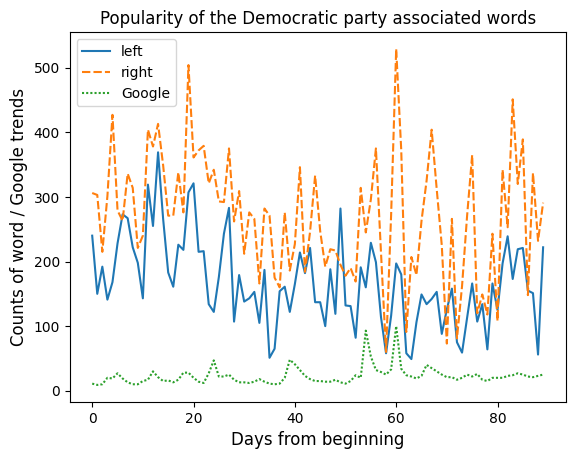

In [29]:
left_data = graph_keyword_trend("_left", df_left = df_left_2, df_right = df_right_2, google_trend = google_trend["Left"])

# Set title and labels with font size
plt.title('Popularity of the Democratic party associated words', fontsize=12)
plt.xlabel('Days from beginning', fontsize=12)
plt.ylabel('Counts of word / Google trends', fontsize=12)

# Show the plot
plt.show()

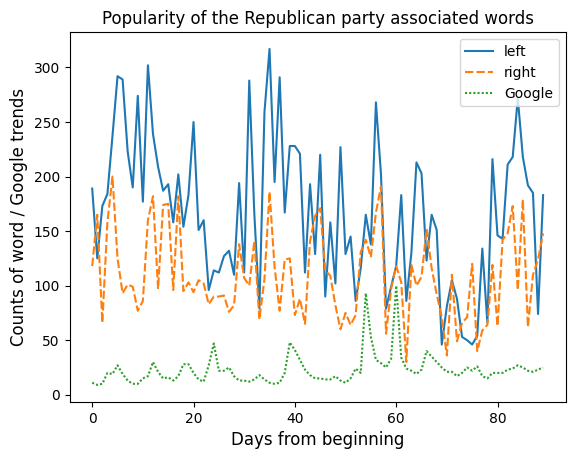

In [30]:
right_data = graph_keyword_trend("_right", df_left = df_left_2, df_right = df_right_2, google_trend = google_trend["Right"])

# Set title and labels with font size
plt.title('Popularity of the Republican party associated words', fontsize=12)
plt.xlabel('Days from beginning', fontsize=12)
plt.ylabel('Counts of word / Google trends', fontsize=12)

# Show the plot
plt.show()

## Trend analysis 2: individual meida trend analysis

In [192]:
def normalized_word_counts_by_day(df, words):
    df = df[df['word_2'].isin(words)]
    df["date"] = df["date"].apply(group_by_day)

    grouped_value_counts = df.groupby('date')['date'].value_counts()
        
    # Loop through the date range
    start_date = date(2022, 1, 1)
    current_date = start_date
    data = []
    for i in range(90):
        strdate = current_date.strftime('%Y%m%d')
        if strdate in grouped_value_counts:
            data.append((grouped_value_counts[strdate]))
        else:
            data.append(0)
            
        current_date += timedelta(days=1)

    return pd.DataFrame(data, columns=["counts"])

def calculate_oneside_trends(df_one_side, kwords):
    # graph left medias
    trends = pd.DataFrame()
    left_group = df_one_side.groupby('name')

    # Loop through the groupby object
    for group_name, group_df in left_group:
        trends[group_name] = normalized_word_counts_by_day(group_df, kwords)
    return trends

def graph_keyword_trend(kwords, google_trend_data, df_left = df_left, df_right = df_right, CI = 75):
    # calculate trends
    df_left_trends = calculate_oneside_trends(df_left, kwords).reset_index()
    df_right_trends = calculate_oneside_trends(df_right, kwords).reset_index()

    # Melt the DataFrame
    df_left_long = pd.melt(df_left_trends, id_vars='index', value_vars=df_left_trends.columns, var_name='Column', value_name='Value')
    df_right_long = pd.melt(df_right_trends, id_vars='index', value_vars=df_right_trends.columns, var_name='Column', value_name='Value')

    # producing graph
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot with Seaborn
    sns.lineplot(data=df_left_long, x='index', y='Value', ax=ax1, errorbar=('ci', CI))
    sns.lineplot(data=df_right_long, x='index', y='Value', ax=ax1, errorbar=('ci', CI))
    ax1.set_xlabel('Days from beginning', fontsize=12)
    ax1.set_ylabel('Counts of word', fontsize=12)


    # plot Google Trend
    ax2 = ax1.twinx()
    sns.lineplot(data=google_trend_data, ax=ax2, color='green')
    ax2.set_ylabel('Google trends', fontsize=12)

    # create legends
    ax1.legend(labels= ['Left Media', f'{CI}% confidence interval', 'Right Media', f'{CI}% confidence interval'], loc='upper left')
    ax2.legend(labels= ["Google Trend"], loc='upper right')


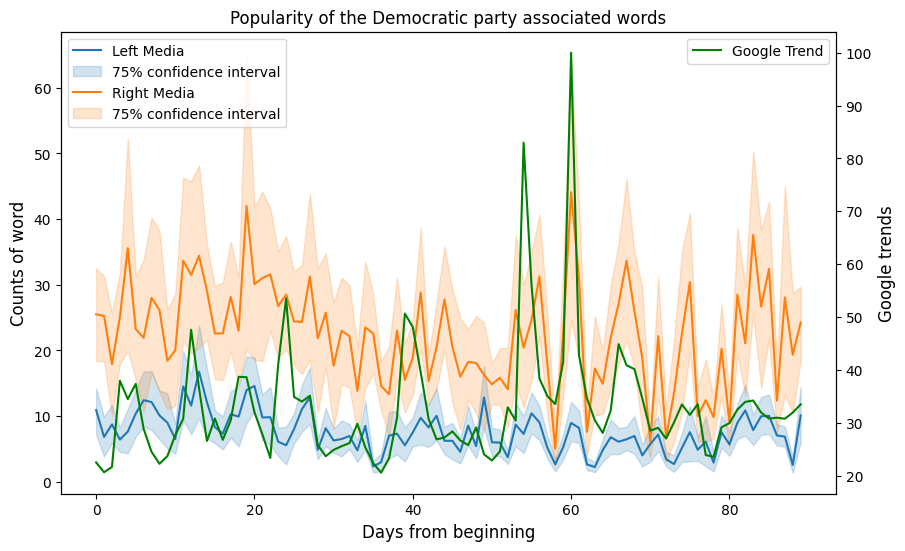

In [193]:
# Enhance the plot
graph_keyword_trend(kwords = left, google_trend_data = pd.read_csv("../data/Google_weighted_trend_inidivual.csv")["Left"])

plt.title('Popularity of the Democratic party associated words', fontsize=12)
plt.show()

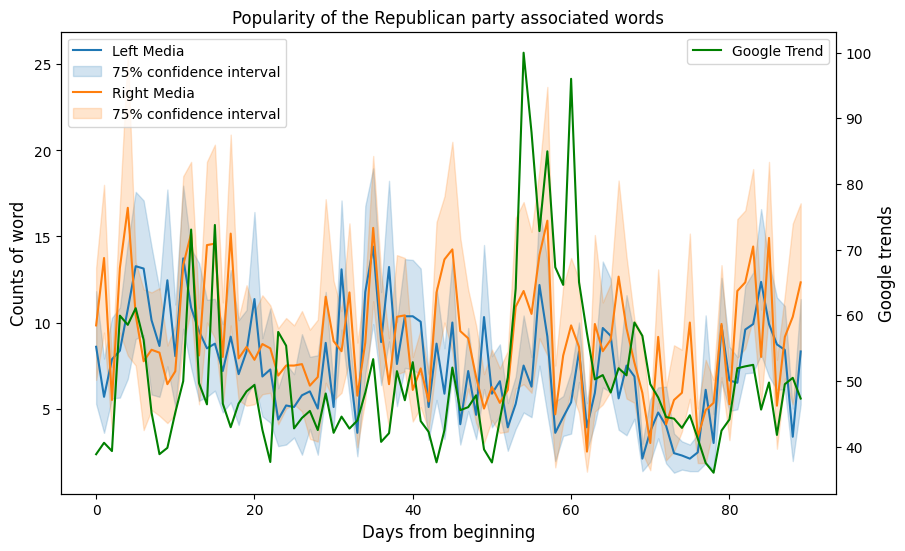

In [196]:
# Enhance the plot
graph_keyword_trend(kwords = right, google_trend_data = pd.read_csv("../data/Google_weighted_trend_inidivual.csv")["Right"])

plt.title('Popularity of the Republican party associated words', fontsize=12)
plt.show()

## Trend statistical Analysis

In [31]:
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

In [32]:
def normalize_and_dtw(data, transform = True):
    # perpare the series
    s1 = (data["left"] / max(data["left"])) * 100
    s2 = (data["right"] / max(data["right"])) * 100
    
    s1 = [(index, value) for index, value in enumerate(s1)]
    s2 = [(index, value) for index, value in enumerate(s2)]

    #dtw
    if transform:
        distance, path = fastdtw(s1, s2, radius = 3)
        # You can transform one time series to match the other using the 'path'
        s1 = [s1[j] for i, j in path]

    s1 = pd.DataFrame(s1, columns = ["time", "left"])
    s1 = s1.drop_duplicates()
    s1.set_index('time', inplace=True)

    s2 = pd.DataFrame(s2, columns = ["time", "right"])
    
    s_graph = pd.concat([s1["left"], s2["right"]], axis= 1)
    return (distance,s_graph)

In [33]:
def Google_and_dtw(data, transform = True):
    # perpare the series
    s1 = (data["left"] / max(data["left"])) * 100
    s2 = (data["right"] / max(data["right"])) * 100
    s_google = data["Google"]
    
    s1 = [(index, value) for index, value in enumerate(s1)]
    s2 = [(index, value) for index, value in enumerate(s2)]

    #dtw
    if transform:
        l_distance, path = fastdtw(s1, s_google, radius = 3)
        r_distance, path = fastdtw(s2, s_google, radius = 3)


    return (l_distance, r_distance)

In [38]:
Google_and_dtw(left_data)

(4683.433604336045, 5117.0586011342175)

In [34]:
Google_and_dtw(right_data)

(5097.2618296529945, 5362.0)

In [36]:
normalize_and_dtw(left_data)[0]

1027.6507036336907

In [35]:
normalize_and_dtw(right_data)[0]

1258.6419558359619

<Axes: >

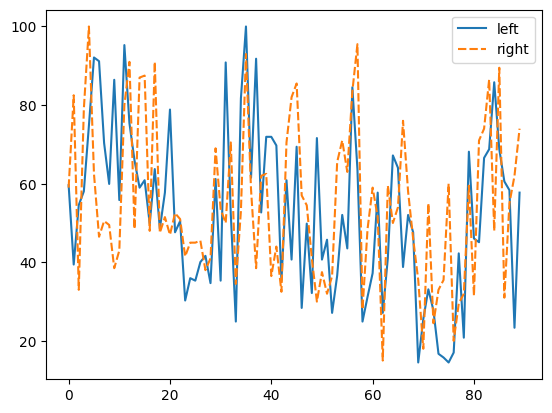

In [145]:
sns.lineplot(normalize_and_dtw(right_data, transform=False))

## Stationarity test

In [24]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test on both series
adf_test_left = adfuller(right_data["left"])
adf_test_right = adfuller(right_data["right"])

# Prepare the results
adf_results = {
    "Left Series ADF Statistic": adf_test_left[0],
    "Left Series p-value": adf_test_left[1],
    "Right Series ADF Statistic": adf_test_right[0],
    "Right Series p-value": adf_test_right[1]}

adf_results

{'Left Series ADF Statistic': -3.7057503279505206,
 'Left Series p-value': 0.004032993826542565,
 'Right Series ADF Statistic': -5.2893231637020985,
 'Right Series p-value': 5.761495333787746e-06}

In [25]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test on both series
kpss_test_left = kpss(right_data["left"], 'c')
kpss_test_right = kpss(right_data['right'], 'c')

# Prepare the results
kpss_results = {
    "Left Series KPSS Statistic": kpss_test_left[0],
    "Left Series p-value": kpss_test_left[1],
    "Right Series KPSS Statistic": kpss_test_right[0],
    "Right Series p-value": kpss_test_right[1]
}

kpss_results

/tmp/ipykernel_5168/1348630228.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test_right = kpss(right_data['right'], 'c')


{'Left Series KPSS Statistic': 0.5426436750977066,
 'Left Series p-value': 0.03206223533835437,
 'Right Series KPSS Statistic': 0.244035448569011,
 'Right Series p-value': 0.1}